In [1]:
import pandas as pd
import h5py
import numpy as np

import matplotlib.pyplot as plt


from tools import add_interactions  # custom tools defined in this directory
from math import isclose

# Load data

In [2]:
work_dir = "/home/mlindner/coen/micha/netsci_vs_gnn/"

X20_path = work_dir + "grids20/network_measures_final.csv"
y20_path = work_dir + "grids20/snbs_complete.h5"
X100_path = work_dir + "grids100/network_measures_final.csv"
y100_path = work_dir + "grids100/snbs_complete.h5"
Xtex_path = work_dir + "gridstexas/network_measures_final.csv"
ytex_path = work_dir + "gridstexas/snbs_1.h5"

_X20 = pd.read_csv(X20_path).drop(columns=['maximal_line_load_post_dc', 'backup_capacity'])
_X100 = pd.read_csv(X100_path).drop(columns=['maximal_line_load_post_dc', 'backup_capacity'])
_Xtex = pd.read_csv(Xtex_path).drop(columns=['maximal_line_load_post_dc', 'backup_capacity'])

with h5py.File(y20_path, 'r') as hf:
    y20 = np.array(hf.get(list(hf.keys())[0])).flatten()

with h5py.File(y100_path, 'r') as hf:
    y100 = np.array(hf.get(list(hf.keys())[0])).flatten()

with h5py.File(ytex_path, 'r') as hf:
    ytex = np.array(hf.get(list(hf.keys())[0])).flatten()

In [3]:
names = ['P', 'AP', 'A²P', 'A³P', 'row-sum A²', 'row-sum A³', 'node degree',
       'degree centrality', 'minimum neighbor degree', 'maximum neighbor degree',
       'clustering coefficient', 'betweenness centrality', 'closeness centrality',
       'load centrality', 'eigenvector centrality', 'Katz centrality',
       'second-order centrality', 'current-flow closeness centrality',
       'current-flow betweenness centrality', 'mean neighbor degree',
       'harmonic centrality', 'square clustering', 'eccentricity', 'tree node classification',
       'bulk', 'root', 'dense sprout', 'sparse sprout', 'inner tree node',
       'proper leaf', 'fiedler vector', 'node connected to max loaded line',
       'max load connected lines', 'min load connected lines',
       'mean load connected lines', 'resistance-distance centrality',
       'degree assortativity coefficient', 'transitivity', 'diameter',
       'P-assortativity coefficient', 'Kirchhoff index',
       'resistance-distance Kirchhoff index', 'inverse algebraic connectivity',
       'eigenratio', 'power sign ratio', 'max line load',
       'universal Kuramoto order parameter', 'graph connected w/o max loaded line']

global_names = [
        'degree assortativity coefficient',
        'P-assortativity coefficient',
        'transitivity', 
        'diameter',
        'Kirchhoff index',
        'resistance-distance Kirchhoff index', 
        'inverse algebraic connectivity',
        'eigenratio',
        'power sign ratio', 
        'max line load',
        'universal Kuramoto order parameter',
        'graph connected w/o max loaded line'
    ]

In [4]:
# Check that global network measures are constant for all Texas nodes
_Xtex.apply(lambda col: col.unique()).apply(len) == 1

P                                        False
AP                                       False
AAP                                      False
AAAP                                     False
row_sum_AA                               False
row_sum_AAA                              False
degree                                   False
degree_centrality                        False
neighbor_degree_min                      False
neighbor_degree_max                      False
clustering                               False
betweenness_centrality                   False
closeness_centrality                     False
load_centrality                          False
eigenvector_centrality                   False
katz_centrality                          False
second_order_centrality                  False
current_flow_closeness_centrality        False
current_flow_betweenness_centrality      False
average_neighbor_degree                  False
harmonic_centrality                      False
square_cluste

In [5]:
_X20.columns = names
_X100.columns = names
_Xtex.columns = names

# Univariate correlation

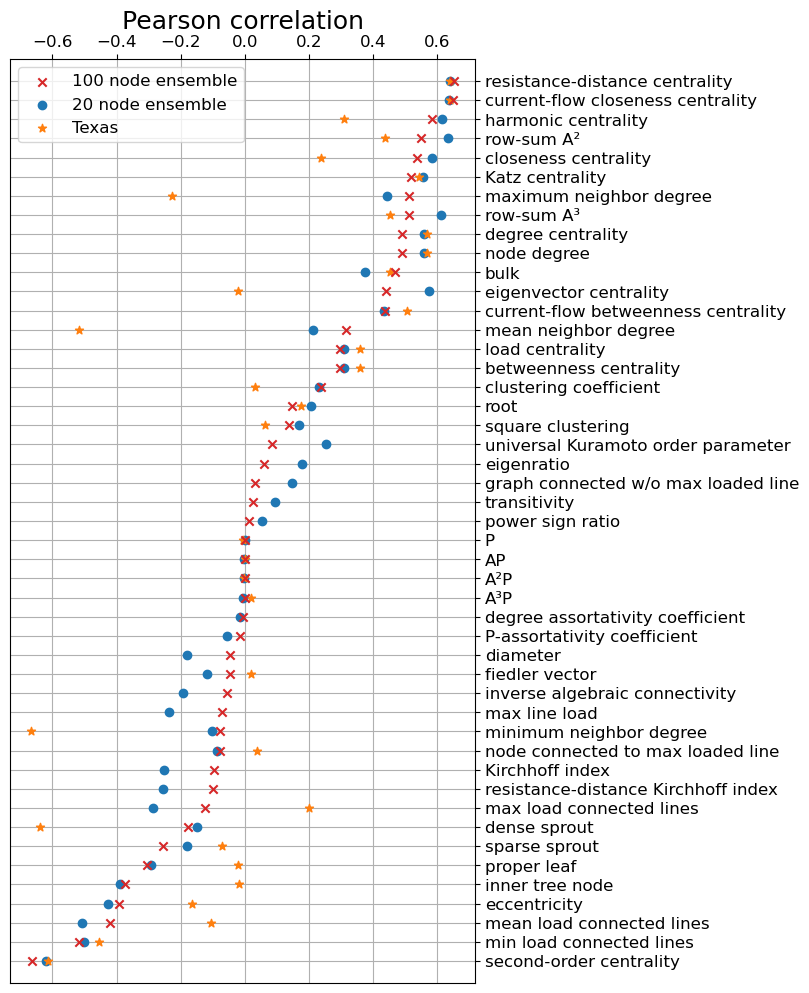

In [6]:
from sklearn.feature_selection import r_regression

X20 = _X20.drop(columns=['tree node classification'])
X100 = _X100.drop(columns=['tree node classification'])
Xtex = _Xtex.drop(columns=['tree node classification'])
    

fig = plt.figure(figsize=(6,12))

pearson_100 = r_regression(X100,y100)
pearson_20 = r_regression(X20,y20)

plt.scatter(*reversed(list(zip(*sorted(zip(X100.columns, pearson_100), key=lambda x: x[1])))),
            color="tab:red", marker="x", zorder=2, label="100 node ensemble")
plt.scatter(*reversed(list(zip(*sorted(zip(X20.columns, pearson_20), key=lambda x: x[1])))),
            color="tab:blue", marker="o", label="20 node ensemble")


pearson_tex = r_regression(Xtex.drop(columns=global_names),ytex)
   
                  
plt.scatter(*reversed(list(zip(*sorted(zip(X100.columns.drop(global_names), pearson_tex),
                                       key=lambda x: x[1])))), color="tab:orange", marker="*", label="Texas")
#plt.tight_layout()

ax = plt.gca()
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top') 
ax.set_axisbelow(True)
ax.yaxis.tick_right()
#ax.set_yticklabels([])


# secax = ax.secondary_xaxis('bottom',functions=(lambda x: x**2, lambda x: x**(1/2)))


plt.margins(0.05, 0.025)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Pearson correlation", fontsize=18)
plt.grid()
plt.legend( fontsize=12)



plt.savefig("univariate_pearson_named.png", dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()

# Univariate R^2

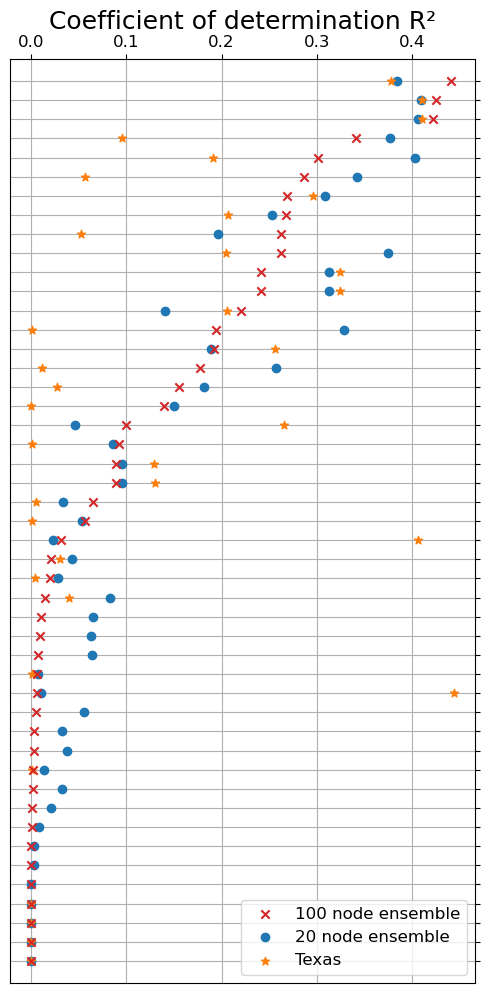

In [7]:
from sklearn.feature_selection import r_regression


fig = plt.figure(figsize=(6,12))


plt.scatter(*reversed(list(zip(*sorted(zip(X100.columns, pearson_100**2), key=lambda x: x[1])))),
            color="tab:red", marker="x", zorder=2)
plt.scatter(*reversed(list(zip(*sorted(zip(X20.columns, pearson_20**2), key=lambda x: x[1])))),
            color="tab:blue", marker="o")

                  
plt.scatter(*reversed(list(zip(*sorted(zip(X100.columns.drop(global_names), pearson_tex**2), key=lambda x: x[1])))), color="tab:orange", marker="*")
#plt.tight_layout()

ax = plt.gca()
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top') 
ax.set_axisbelow(True)
ax.yaxis.tick_right()
ax.set_yticklabels([])


# secax = ax.secondary_xaxis('bottom',functions=(lambda x: x**2, lambda x: x**(1/2)))


plt.margins(0.05, 0.025)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Coefficient of determination R²", fontsize=18)
plt.grid()
plt.legend(["100 node ensemble", "20 node ensemble", "Texas"], fontsize=12)



plt.savefig("univariate_r2.png", dpi=300, bbox_inches='tight', pad_inches=0.01)
plt.show()

# Univariate mutual Info

In [8]:
from sklearn.feature_selection import mutual_info_regression



X20 = _X20
X100 = _X100
Xtex = _Xtex

X20['tree node classification'] = pd.factorize(X20['tree node classification'])[0]
X100['tree node classification'] = pd.factorize(X100['tree node classification'])[0]
Xtex['tree node classification'] = pd.factorize(Xtex['tree node classification'])[0]

In [9]:
# This takes a while
mi20 = mutual_info_regression(X20,y20, discrete_features=[list(X20.columns).index("tree node classification")])
mi100 = mutual_info_regression(X100,y100, discrete_features=[list(X100.columns).index("tree node classification")])
mitex = mutual_info_regression(Xtex,ytex, discrete_features=[list(Xtex.columns).index("tree node classification")])

In [10]:
# It's a bit strange that MI for constant global measures is greater than 0 in some cases (when it should be 0)
# Maybe because of Float precision?
global_mi = {}

for i, res in enumerate(mitex):
    name = X100.columns[i]
    if name in global_names:
        global_mi[name] = mitex[i] # == 0.0?
        mitex[i] = 0

In [11]:
global_mi

{'degree assortativity coefficient': 0.0006005009270229067,
 'transitivity': 0.0,
 'diameter': 0.0,
 'P-assortativity coefficient': 0.019274596819929934,
 'Kirchhoff index': 0.0005235602094249003,
 'resistance-distance Kirchhoff index': 8.881784197001252e-16,
 'inverse algebraic connectivity': 0.0005235602094249003,
 'eigenratio': 0.00818733704336938,
 'power sign ratio': 0.0,
 'max line load': 0.0023748062204858034,
 'universal Kuramoto order parameter': 0.0,
 'graph connected w/o max loaded line': 0.0}

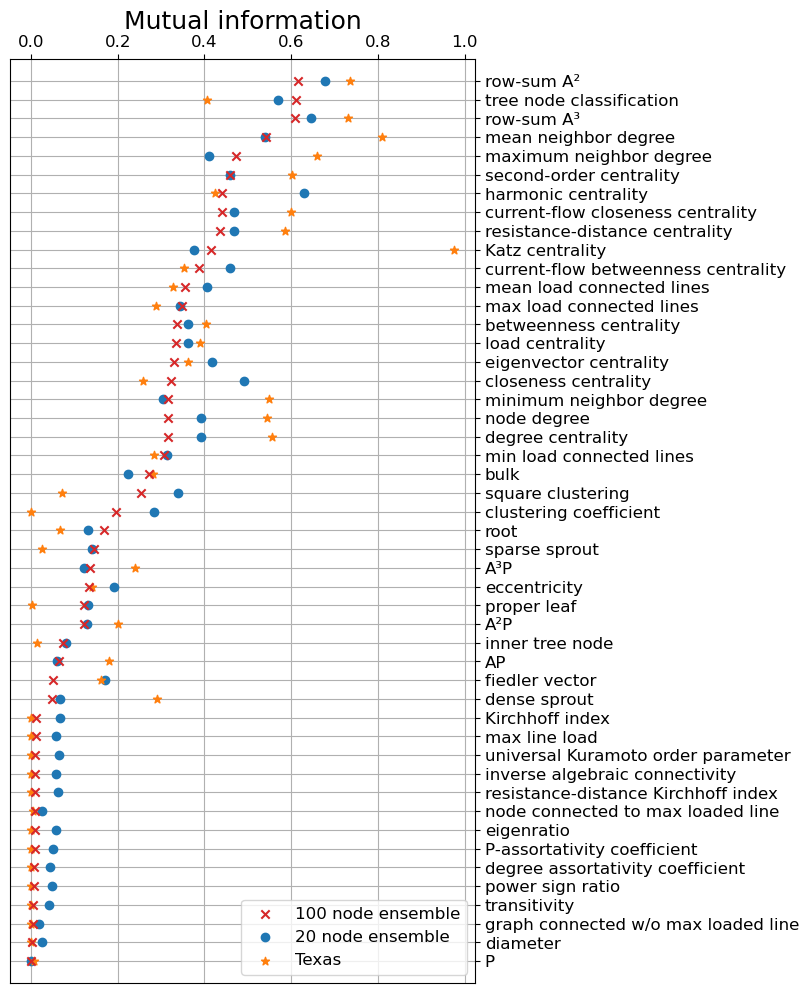

In [13]:

fig = plt.figure(figsize=(6, 12))

plt.scatter(*reversed(list(zip(*sorted(zip(X100.columns, mi100), key=lambda x: x[1])))), color="tab:red", marker="x", zorder=2)
plt.scatter(*reversed(list(zip(*sorted(zip(X20.columns, mi20), key=lambda x: x[1])))), color="tab:blue", marker="o")
plt.scatter(*reversed(list(zip(*sorted(zip(Xtex.columns, mitex), key=lambda x: x[1])))), color="tab:orange", marker="*")

ax = plt.gca()
ax.xaxis.tick_top() 
ax.xaxis.set_label_position('top') 
ax.set_axisbelow(True)
ax.yaxis.tick_right()


plt.margins(0.05, 0.025)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Mutual information", fontsize=18)
plt.grid()
plt.legend(["100 node ensemble", "20 node ensemble", "Texas"], fontsize=12)
plt.savefig("univariate_mi.png", dpi=400, bbox_inches='tight')
plt.show()


###### old

In [12]:
from sklearn.feature_selection import r_regression

X20 = _X20.drop(columns=['node_cat'])
X100 = _X100.drop(columns=['node_cat'])
Xtex = _Xtex.drop(columns=['node_cat'])
    

fig = plt.figure(figsize=(10, 4))
plt.scatter(*zip(*sorted(zip(X100.columns, abs(r_regression(X100,y100))**2), key=lambda x: x[1])), color="tab:red", marker="x")
plt.scatter(*zip(*sorted(zip(X20.columns, abs(r_regression(X20,y20))**2), key=lambda x: x[1])), color="tab:blue", marker="o")
plt.scatter(*zip(*sorted(zip(X100.columns, abs(r_regression(Xtex,ytex))**2), key=lambda x: x[1])), color="tab:orange", marker="*")
plt.tight_layout()
plt.margins(0.025,0.05)
plt.yticks(fontsize=12)
plt.xticks(rotation=90, fontsize=12)
plt.ylabel("R²", fontsize=18)
plt.legend(["dataset100", "dataset20", "texas"], fontsize=12)
#plt.savefig("univariate_r2.png", dpi=400, bbox_inches='tight')
plt.show()

KeyError: "['node_cat'] not found in axis"